In [12]:
import requests
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

"""
    Define SVM using different kernels: Linear('linear'), polynomial('poly'), RBF('rbf'), and Sigmoid('sigmoid')
    **Preform dimensionality reduction
"""

df = pd.read_csv('Nov27_Final_Dataset.csv')

feature_df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'
                 , 'liveness', 'valence', 'tempo', 'key', 'duration']]
popular_df = df['popular'].astype('bool')

# Independent Variable
X = np.asarray(feature_df)

# Dependent Variable
y = np.asarray(popular_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Define kernel
classifier = svm.SVC(kernel='poly', gamma='auto', C=2)

# Fit and execute prediction
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(f"Mean accuracy: {classifier.score(X_test, y_test)}")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

df = pd.read_csv('Nov27_Final_Dataset.csv')

feature_df = df[['danceability', 'energy', 'valence']]
popular_df = df['popular'].astype('bool')

# Independent Variable
X = np.asarray(feature_df)

# Dependent Variable|
y = np.asarray(popular_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# Define kernel
classifier = svm.SVC(kernel='poly', gamma='auto', C=2, probability=True)

# Fit and execute prediction
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print(classification_report(y_test, y_predict))
print(f"Mean accuracy: {classifier.score(X_test, y_test)}")

              precision    recall  f1-score   support

       False       0.68      0.79      0.73        80
        True       0.63      0.50      0.56        58

    accuracy                           0.67       138
   macro avg       0.66      0.64      0.65       138
weighted avg       0.66      0.67      0.66       138

Mean accuracy: 0.6666666666666666


Mean accuracy: 0.6666666666666666


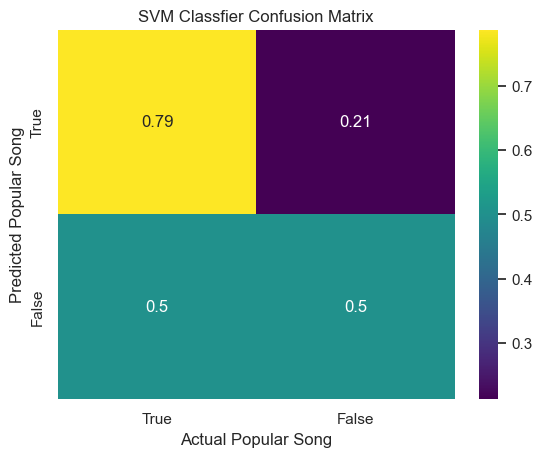

In [6]:

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as ptl

mat = confusion_matrix(y_test, y_predict, normalize="true")      # unsure about the results of this confusion matrix
class_labels = ['True', 'False']
sns.heatmap(mat, annot=True, cmap='viridis', xticklabels=class_labels, yticklabels=class_labels)

ptl.title('SVM Classfier Confusion Matrix')
ptl.xlabel('Actual Popular Song')
ptl.ylabel('Predicted Popular Song')

print(f"Mean accuracy: {classifier.score(X_test, y_test)}")

In [50]:

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

df = pd.read_csv('Nov27_Final_Dataset.csv')

# Load a dataset (replace this with your own dataset)
feature_df = df[['danceability', 'energy', 'valence']]
popular_df = df['popular'].astype('bool')

# Independent Variable
X = np.asarray(feature_df)

# Dependent Variable
y = np.asarray(popular_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with SVM and standard scaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())  # Support Vector Machine
])

# Define the hyperparameters to search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['poly'],  # Kernel type
    'svm__degree': [2, 3, 4],
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)



Best hyperparameters: {'svm__C': 100, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Test set accuracy: 0.5545454545454546


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

df = pd.read_csv('Nov27_Final_Dataset.csv')
feature_df = df[['danceability','energy', 'valence']]
popular_df = df['popular'].astype('bool')

# Independent Variable
X = np.asarray(feature_df)

# Dependent Variable
y = np.asarray(popular_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# Define kernel
clf = DecisionTreeClassifier(random_state=42)

# Cross validation
dt_cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"SVM 10-Fold Cross-Validation Scores: {dt_cv_scores}")
print("Mean cross-validated score:", dt_cv_scores.mean())

clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

SVM 10-Fold Cross-Validation Scores: [0.66666667 0.70731707 0.53658537 0.70731707 0.63414634 0.58536585
 0.65853659 0.46341463 0.6097561  0.70731707]
Mean cross-validated score: 0.6276422764227643
              precision    recall  f1-score   support

       False       0.70      0.69      0.69        80
        True       0.58      0.59      0.58        58

    accuracy                           0.64       138
   macro avg       0.64      0.64      0.64       138
weighted avg       0.65      0.64      0.65       138

Decision Tree Accuracy: 0.644927536231884


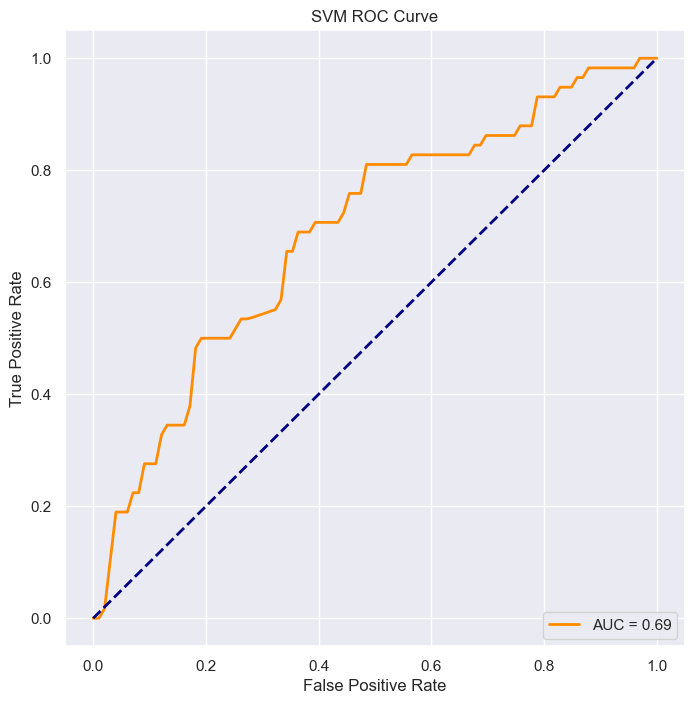

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Set characteristics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Interpolation
interp_fpr = np.linspace(0, 1, 100)
interp_tpr = np.interp(interp_fpr, fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(interp_fpr, interp_tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()